# Miriade DataGame

In [2]:
from my_functions import *
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
RANDOM_STATE = 42

In [4]:
train = pd.read_csv("/home/null/PycharmProjects/Miriade/data/raw_data/dataset_stima.csv")
test = pd.read_csv("/home/null/PycharmProjects/Miriade/data/raw_data/dataset_previsione.csv")
test_copy = test.copy(deep=True)

In [5]:
train.columns

Index(['PUBBLICITA', 'INIZIO_PUBBLICITA', 'FINE_PUBBLICITA',
       'MACRO_TIPO_PUBBLICITA', 'FASCIA_ORARIA', 'FASCIA_TEMPISTICA',
       'TIPO_PUBBLICITA', 'DATA', 'CODICE_GIOCO', 'RILANCIO_PUBBLICITA',
       'SESSIONE', 'NUMERO_CLICK_SITO', 'OFFERTA_PROMOZIONALE',
       'MACRO_CATEGORIA_GIOCO', 'MICRO_CATEGORIA_GIOCO', 'AREA_CLICK',
       'NUMERO_PUBBLICITA_CONCORRENTI', 'ID'],
      dtype='object')

In [204]:
## imputazione valore modale alla var PUBBLICITA
#moda_PUBBLICITA = stats.mode(train['PUBBLICITA'])
#train['PUBBLICITA'] = train['PUBBLICITA'].fillna(int(moda_PUBBLICITA.mode))
## imputazione valore modale alla var PUBBLICITA
#moda_TIPO_PUBBLICITA = stats.mode(train['TIPO_PUBBLICITA'])
#train['TIPO_PUBBLICITA'] = train['TIPO_PUBBLICITA'].fillna(int(moda_TIPO_PUBBLICITA.mode))

In [205]:
#df_train_new = pd.read_csv("/home/null/PycharmProjects/Miriade/data/df_train_new.csv")
#df_test_new = pd.read_csv("/home/null/PycharmProjects/Miriade/data/df_test_new.csv")
#train = pd.concat([train, df_train_new], axis=1)
#test = pd.concat([test, df_test_new], axis=1)

In [4]:
# drop missing
train.dropna(axis=0, inplace=True)

# drop delle osservazioni con var NUMERO_CLICK_SITO con valori negativi
train.drop(train[train.NUMERO_CLICK_SITO < 0].index, inplace=True)

# drop outlier della var. NUMERO_CLICK_SITO
train.drop(train[train['NUMERO_CLICK_SITO'] > 11000].index, inplace=True)

In [200]:
train = fix_data(train)
test = fix_data(test)

KeyboardInterrupt: 

In [207]:
## correzione anno 3000
#train = fix_3000(train)
#test = fix_3000(test)


In [5]:
def fix_vars(df):

    # Aggiustamento dtype delle variabili

    df['PUBBLICITA'] = df['PUBBLICITA'].astype('int').astype('category')
    df['MACRO_TIPO_PUBBLICITA'] = df['MACRO_TIPO_PUBBLICITA'].astype('category')
    df['FASCIA_ORARIA'] = df['FASCIA_ORARIA'].astype('category')
    df['FASCIA_TEMPISTICA'] = df['FASCIA_TEMPISTICA'].astype('category')
    df['CODICE_GIOCO'] = df['CODICE_GIOCO'].astype('category')
    df['RILANCIO_PUBBLICITA'] = df['RILANCIO_PUBBLICITA'].astype('int')
    df['SESSIONE'] = df['SESSIONE'].astype('int').astype('category')
    df['MACRO_CATEGORIA_GIOCO'] = df['MACRO_CATEGORIA_GIOCO'].astype('category')
    df['MICRO_CATEGORIA_GIOCO'] = df['MICRO_CATEGORIA_GIOCO'].astype('category')
    df['AREA_CLICK'] = df['AREA_CLICK'].astype('int')
    df['ID'] = df['ID'].astype('int').astype('category')

    return df

In [211]:
# aggiustamento dtype delle variabili
train = fix_vars(train)
test = fix_vars(test)

In [89]:
## Aggiustamento variabili INIZIO_PUBBLICTA e FINE_PUBBLICITA
#train = fix_inizio_fine(train)
#test = fix_inizio_fine(test)

In [90]:
## Aggiustamento var DATA per rispettare i limiti delle var INIZIO_PUBBLICITA e FINE_PUBBLICITA
#train = fix_data_limit(train)
#test = fix_data_limit(test)

In [91]:
## inserimento nuova variabile NEW_DOMENICA
#train = insert_NEW_DOMENICA(train)
#test = insert_NEW_DOMENICA(test)

In [92]:
## inserimento nuova variabile NEW_RANGE
#train = insert_NEW_RANGE(train)
#test = insert_NEW_RANGE(test)

In [66]:
#train.to_csv("/home/null/PycharmProjects/Miriade/data/train_processed_1.csv")
#test.to_csv("/home/null/PycharmProjects/Miriade/data/test_processed_1.csv")
#train = pd.read_csv("/home/null/PycharmProjects/Miriade/data/train_processed_1.csv")
#test = pd.read_csv("/home/null/PycharmProjects/Miriade/data/test_processed_1.csv")
#train.drop('Unnamed: 0', axis=1, inplace=True)
#test.drop('Unnamed: 0', axis=1, inplace=True)
new_domenica_train = train['NEW_DOMENICA']
new_range_train = train['NEW_RANGE']
new_domenica_test = test['NEW_DOMENICA']
new_range_test = test['NEW_RANGE']
df_train_new = pd.concat([new_domenica_train, new_range_train], axis=1)
df_test_new = pd.concat([new_domenica_test, new_range_test], axis=1)
df_train_new.to_csv("/home/null/PycharmProjects/Miriade/data/df_train_new.csv", index=False, header=['NEW_DOMENICA', 'NEW_RANGE'])
df_test_new.to_csv("/home/null/PycharmProjects/Miriade/data/df_test_new.csv", index=False, header=['NEW_DOMENICA', 'NEW_RANGE'])

In [186]:
[(x,y) for x,y in zip(train.columns, range(len(train.columns)))]

[('PUBBLICITA', 0),
 ('INIZIO_PUBBLICITA', 1),
 ('FINE_PUBBLICITA', 2),
 ('MACRO_TIPO_PUBBLICITA', 3),
 ('FASCIA_ORARIA', 4),
 ('FASCIA_TEMPISTICA', 5),
 ('TIPO_PUBBLICITA', 6),
 ('DATA', 7),
 ('CODICE_GIOCO', 8),
 ('RILANCIO_PUBBLICITA', 9),
 ('SESSIONE', 10),
 ('NUMERO_CLICK_SITO', 11),
 ('OFFERTA_PROMOZIONALE', 12),
 ('MACRO_CATEGORIA_GIOCO', 13),
 ('MICRO_CATEGORIA_GIOCO', 14),
 ('AREA_CLICK', 15),
 ('NUMERO_PUBBLICITA_CONCORRENTI', 16),
 ('ID', 17)]

In [6]:
X = train.iloc[:, [0, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16]] #rimosso 14, 18, 19
y = train.iloc[:, 11]

X_test = test.iloc[:, [0, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15]] #rimosso 13, 17, 18

In [100]:
[(x,y) for x,y in zip(test.columns, range(len(test.columns)))]

[('PUBBLICITA', 0),
 ('INIZIO_PUBBLICITA', 1),
 ('FINE_PUBBLICITA', 2),
 ('MACRO_TIPO_PUBBLICITA', 3),
 ('FASCIA_ORARIA', 4),
 ('FASCIA_TEMPISTICA', 5),
 ('TIPO_PUBBLICITA', 6),
 ('DATA', 7),
 ('CODICE_GIOCO', 8),
 ('RILANCIO_PUBBLICITA', 9),
 ('SESSIONE', 10),
 ('OFFERTA_PROMOZIONALE', 11),
 ('MACRO_CATEGORIA_GIOCO', 12),
 ('MICRO_CATEGORIA_GIOCO', 13),
 ('AREA_CLICK', 14),
 ('NUMERO_PUBBLICITA_CONCORRENTI', 15),
 ('ID', 16),
 ('NEW_DOMENICA', 17),
 ('NEW_RANGE', 18)]

In [126]:
X = train.iloc[:, [0, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19]]
y = train.iloc[:, 11]

X_test = test.iloc[:, [0, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18]]

In [173]:
X.head(100)

PUBBLICITA MACRO_TIPO_PUBBLICITA FASCIA_ORARIA FASCIA_TEMPISTICA  \
0         279                     7             1                 1   
1         286                     7             1                 1   
2           1                     6             4                 4   
3         699                     7             1                 1   
4         473                     7             1                 1   
5         815                     7             1                 1   
6         433                     7             1                 1   
7         594                     7             1                 1   
8         136                     7             1                 1   
9         720                     7             1                 1   
10        686                     2             6                 7   
11        596                     7             1                 1   
12        173                     3             6                 5   
13        156                     7             1                 1   
14          1                     6             4                 4   
15        840                     7             3                 8   
16          1                     6             4                 4   
17        759                     7             1                 1   
18        190                     7             1                 1   
19        440                     7             1                 1   
20        783                     7             1                 1   
21        189                     7             1                 1   
22        660                     7             1                 1   
23        176                     7             1                 1   
24        589                     7             1                 1   
25        742                     2             6                 3   
26        789                     7             1                 1   
27        210                     7             1                 1   
28        814                     7             1                 1   
29        650                     7             1                 1   
..        ...                   ...           ...               ...   
70        516                     7             1                 1   
71        208                     7             1                 1   
72        173                     3             6                 5   
73        136                     7             1                 1   
74          1                     6             4                 4   
75        173                     3             6                 5   
76          1                     6             4                 4   
77          1                     6             4                 4   
78        384                     7             1                 1   
79        686                     2             6                 7   
80        206                     7             1                 1   
81        132                     7             1                 1   
82        173                     3             6                 5   
83          1                     6             4                 4   
84          1                     6             4                 4   
85        599                     7             1                 1   
86        211                     7             1                 1   
87        189                     7             1                 1   
88        135                     7             1                 1   
89          1                     6             4                 4   
90          1                     6             4                 4   
91        190                     7             1                 1   
92        173                     3             6                 5   
93        570                     7             1                 1   
94        143              

In [102]:
## validation
#
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=RANDOM_STATE)
#
#rf_model = RandomForestRegressor(n_estimators=75, n_jobs=-1, random_state=RANDOM_STATE)
#rf_model.fit(X_train, y_train)
#y_pred_validation = rf_model.predict(X_validation)

In [103]:
#msle_validation = mean_squared_log_error(y_validation, y_pred_validation)
#print(msle_validation)
#score_validation = score_fun(y_pred_validation, y_validation)
#print(score_validation)         # 0.03728

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

In [7]:
rf_model = RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=RANDOM_STATE)
rf_model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [8]:
yhat_rf = rf_model.predict(X_test)

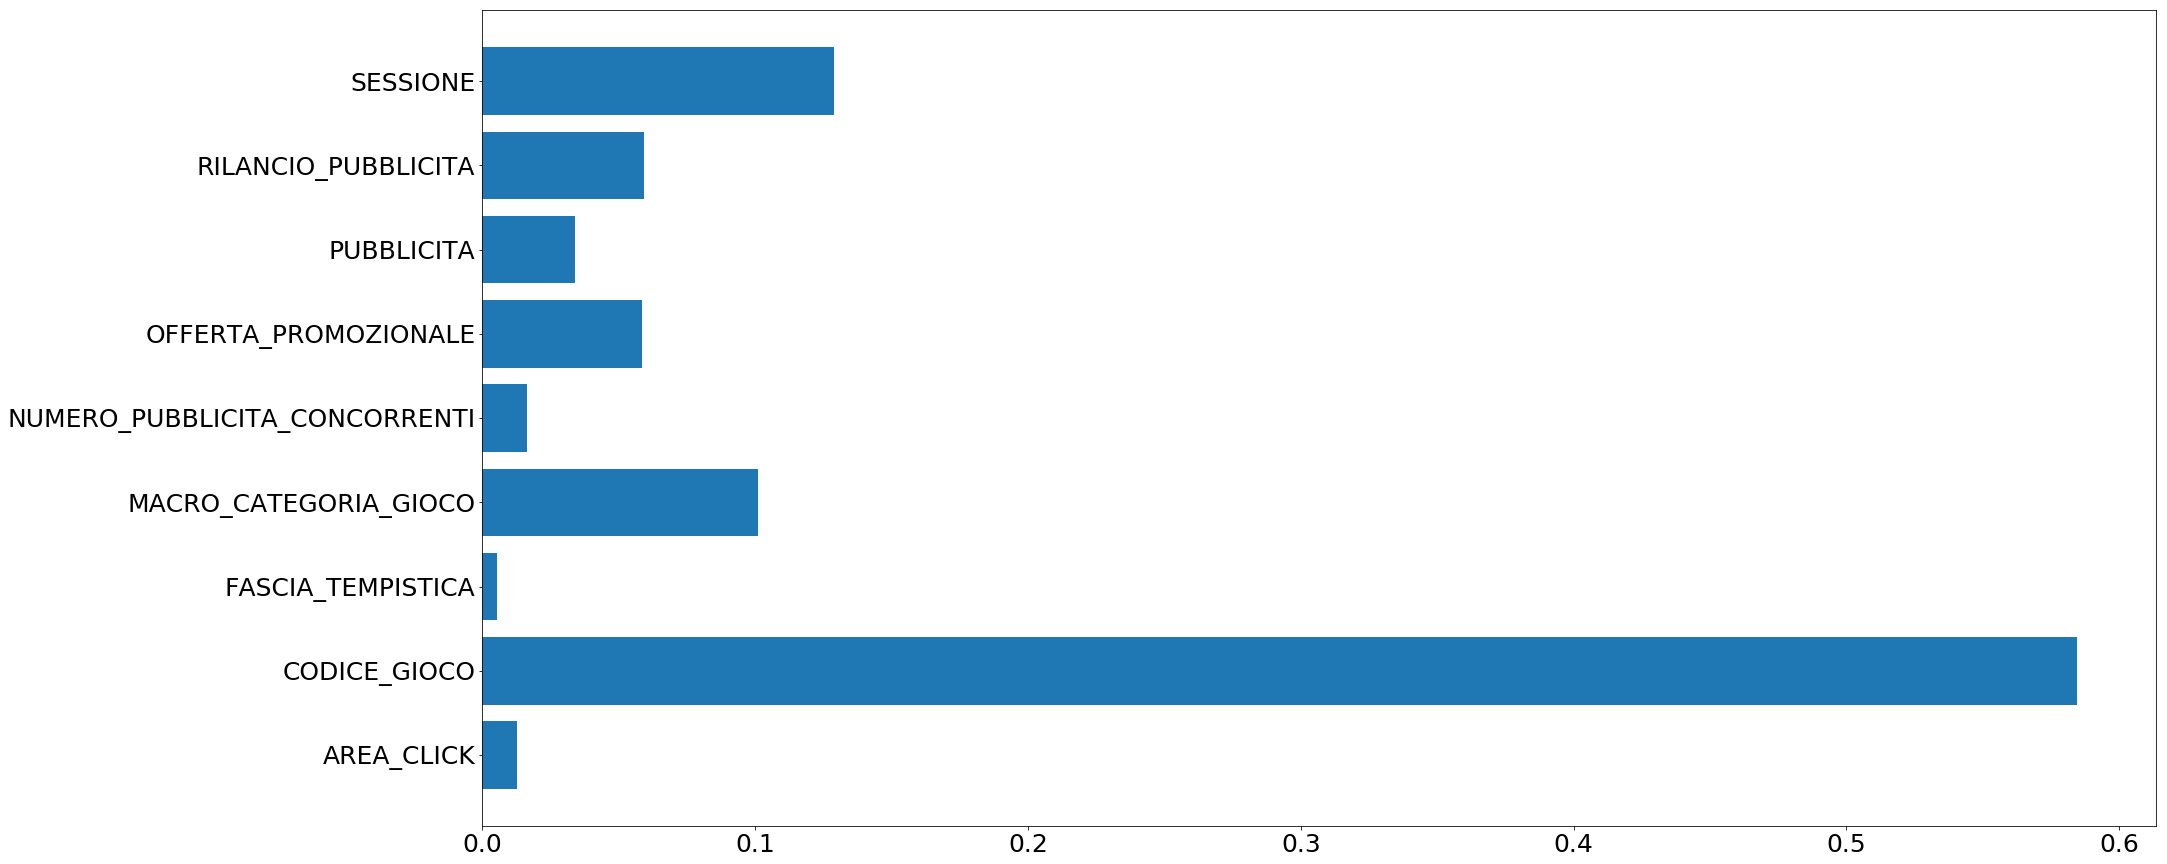

In [106]:
# plotting feature importances

#var_label, var_importance = X.columns, rf_model.feature_importances_
#
#plt.figure(figsize=(30,15))
#plt.barh(var_label, var_importance)
#plt.tick_params(labelsize=25)
#plt.show()

In [159]:
ada_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=150, learning_rate=0.99, loss= 'linear', random_state=RANDOM_STATE)
ada_model.fit(X, y)
yhat_ada = ada_model.predict(X_test)

In [160]:
gb_reg = GradientBoostingRegressor(n_estimators=150, learning_rate=0.98, random_state=RANDOM_STATE)
gb_reg.fit(X, y)
yhat_gb = gb_reg.predict(X_test)

In [168]:
yhat = np.mean([yhat_rf, yhat_ada, yhat_gb], axis=0)

In [217]:
df_grouped = raggruppa(test= test_copy, yhat= yhat_rf)
crea_file_submission(df_grouped, 22)